Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers

such as Naive Bayes, Logistic Regression, or Support Vector

Machines.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
des_df=pd.read_csv('/content/description.txt')

In [3]:
des_df

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


In [15]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

/tmp/ipython-input-3277949839.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [16]:
train_data.sample(5)

,ID,TITLE,GENRE,DESCRIPTION
2911,2912,"""Piya Mann Bhaye"" (2015)",drama,To fall pray for love and to be in love are t...
3767,3768,Go Trabi Go (1991),comedy,Family Struutz lives in Bitterfeld (GDR). Aft...
3298,3299,De potloodmoorden (1982),thriller,"A policeman neglects his young, attractive wi..."
2200,2201,Cheongukui dang (1990),drama,Sung-hie goes to the US to live with her sist...
4713,4714,This Life + 10 (2007),drama,In the one-off special viewers will discover ...


In [17]:
test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

/tmp/ipython-input-382853052.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [18]:
test_data.sample(5)

,ID,TITLE,GENRE,DESCRIPTION
6291,6292,The Heart Stays (????),"When Shannon Ki-he-kah-zhe,an 18-year old hig...",NaN
3631,3632,Vulassic Park (2018),Entrepreneur John Hambone has brought the anc...,NaN
5829,5830,Brother Minister: The Assassination of Malcol...,Brother Minister reveals the mystery surround...,NaN
5584,5585,Elemental Storage (2009),"A young woman, Alice, discovers an archive wh...",NaN
2283,2284,Stone & Ed (2008),It's just another hazy morning for Stone & Ed...,NaN


In [19]:
test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

/tmp/ipython-input-2475430290.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [20]:
test_solution_data.sample(5)

,ID,TITLE,GENRE,DESCRIPTION
4144,4145,Treatment Plan (2011),drama,Treatment Plan - A psychiatric patient in a w...
2826,2827,Boner (2012),comedy,"Jimmy Boner, a 20-something slacker living wi..."
2163,2164,Fasces (2006),drama,"The murder of a councilor, a beating given to..."
398,399,Dongbanja (1984),drama,A man receives orders to assassinate an old t...
3169,3170,The Thickness of Delirium (2007),drama,Shawn has been tormented for years knowing th...


In [26]:
train_data.isnull().sum()

,0
ID,0
TITLE,0
GENRE,0
DESCRIPTION,0


In [27]:
test_data.isnull().sum()

,0
ID,0
TITLE,0
GENRE,0
DESCRIPTION,6531


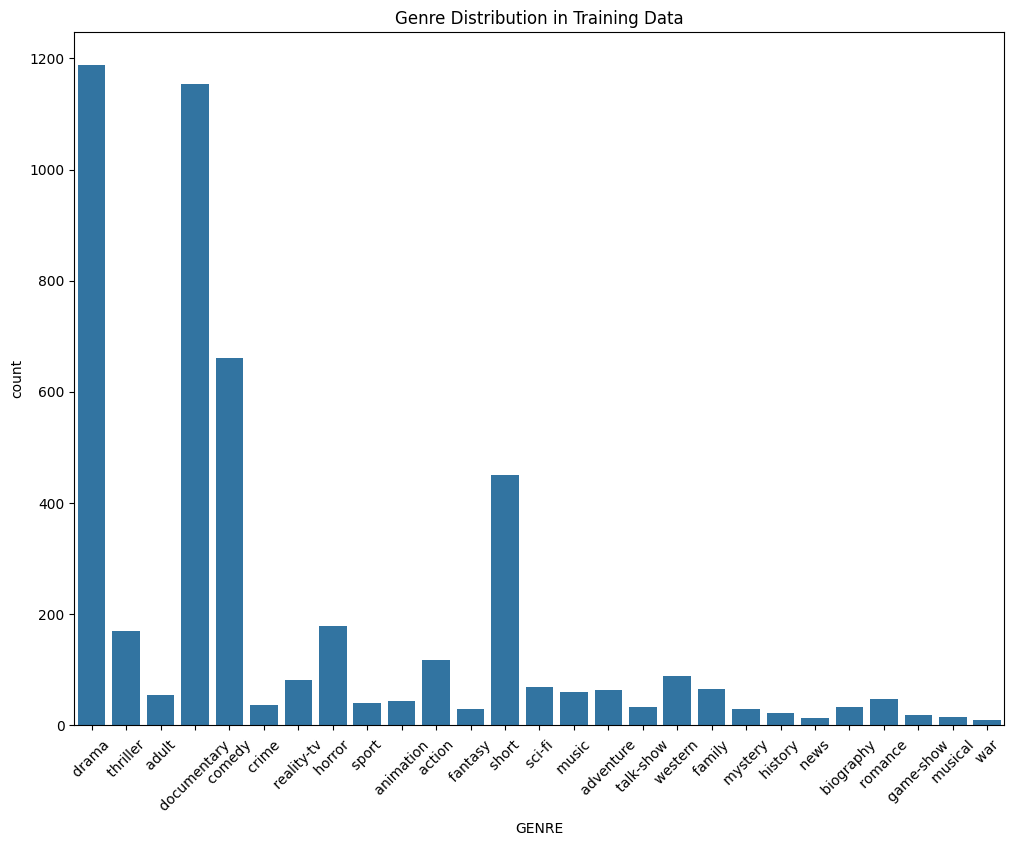

In [25]:
plt.figure(figsize=(12,9))
sns.countplot(data=train_data, x='GENRE')
plt.title("Genre Distribution in Training Data")
plt.xticks(rotation=45)
plt.show()

In [42]:
tfidf=TfidfVectorizer(stop_words='english')
X_train=tfidf.fit_transform(train_data['DESCRIPTION'])
X_test=tfidf.transform(test_solution_data['DESCRIPTION'].fillna(''))

In [43]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

Naive bayes model

In [44]:
Naive_bayes=MultinomialNB()
Naive_bayes.fit(X_train,y_train)

MultinomialNB()

In [49]:
y_pred_naive=Naive_bayes.predict(X_test)
y_pred_naive

array([8, 8, 7, ..., 8, 7, 7])

Logistic Regression Model

In [52]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred_logistic=logistic_regression.predict(X_test)
y_pred_logistic

array([8, 8, 7, ..., 8, 7, 7])

Support Vector Machine Model

In [57]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [59]:
y_pred_svm=svm.predict(X_test)
y_pred_svm

array([8, 8, 7, ..., 8, 7, 7])

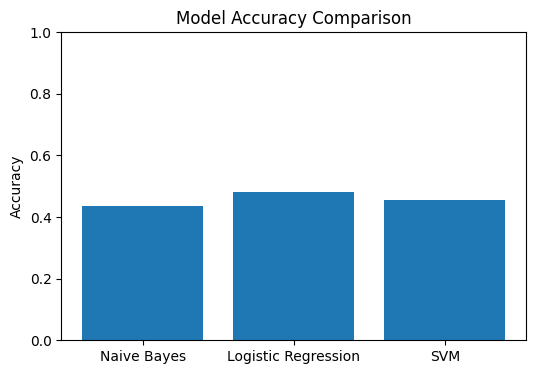

In [61]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_naive),
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_svm)
]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [71]:
def predict_movie(description):
    tfidf1 = tfidf.transform([description])
    pred_label = svm.predict(tfidf1)
    return label_encoder.inverse_transform(pred_label)[0]


sample_descr_for_movie = "A boy fall in love with a girl"
print(predict_movie(sample_descr_for_movie))

 drama 
